# Assigment 2

## Problem 1: Investigation of the Diameter, Height and Volume for Black Cherry Trees

Import data from `trees.csv`.

In [1]:
tree.data = read.csv("trees.csv")

In [2]:
options(warn=-1)
library(ROCR);

### 1. Fit four polynomial models (deg=1,2,3,4) to predict the Volume using Girth. 
Choose the model with the largest adjust R-squared. 
Plot the polynomial function of the model and also plot the confidence bands with ±2 standard error.

In [3]:
summary(lm(Volume~poly(Girth,1),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 1), data = tree.data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.065 -3.107  0.152  3.495  9.587 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     30.1710     0.7637   39.51   <2e-16 ***
poly(Girth, 1)  87.0734     4.2520   20.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.252 on 29 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9331 
F-statistic: 419.4 on 1 and 29 DF,  p-value: < 2.2e-16


In [4]:
summary(lm(Volume~poly(Girth,2),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 2), data = tree.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4889 -2.4293 -0.3718  2.0764  7.6447 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.1710     0.5989  50.374  < 2e-16 ***
poly(Girth, 2)1  87.0734     3.3348  26.111  < 2e-16 ***
poly(Girth, 2)2  14.5918     3.3348   4.376 0.000152 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.335 on 28 degrees of freedom
Multiple R-squared:  0.9616,	Adjusted R-squared:  0.9588 
F-statistic: 350.5 on 2 and 28 DF,  p-value: < 2.2e-16


In [5]:
summary(lm(Volume~poly(Girth,3),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 3), data = tree.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4462 -2.3220 -0.4896  2.0225  7.4458 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.1710     0.6009  50.213  < 2e-16 ***
poly(Girth, 3)1  87.0734     3.3454  26.028  < 2e-16 ***
poly(Girth, 3)2  14.5918     3.3454   4.362 0.000169 ***
poly(Girth, 3)3   3.0335     3.3454   0.907 0.372553    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.345 on 27 degrees of freedom
Multiple R-squared:  0.9627,	Adjusted R-squared:  0.9586 
F-statistic: 232.4 on 3 and 27 DF,  p-value: < 2.2e-16


In [6]:
summary(lm(Volume~poly(Girth,4),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 4), data = tree.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9337 -2.3103 -0.0573  2.0278  7.7704 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.1710     0.6071  49.700  < 2e-16 ***
poly(Girth, 4)1  87.0734     3.3800  25.761  < 2e-16 ***
poly(Girth, 4)2  14.5918     3.3800   4.317 0.000204 ***
poly(Girth, 4)3   3.0335     3.3800   0.897 0.377694    
poly(Girth, 4)4  -2.2684     3.3800  -0.671 0.508053    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.38 on 26 degrees of freedom
Multiple R-squared:  0.9634,	Adjusted R-squared:  0.9577 
F-statistic: 170.9 on 4 and 26 DF,  p-value: < 2.2e-16


From above summary of each poly model, we can see the poly model of degree 2 has the largest adjust R-squared.

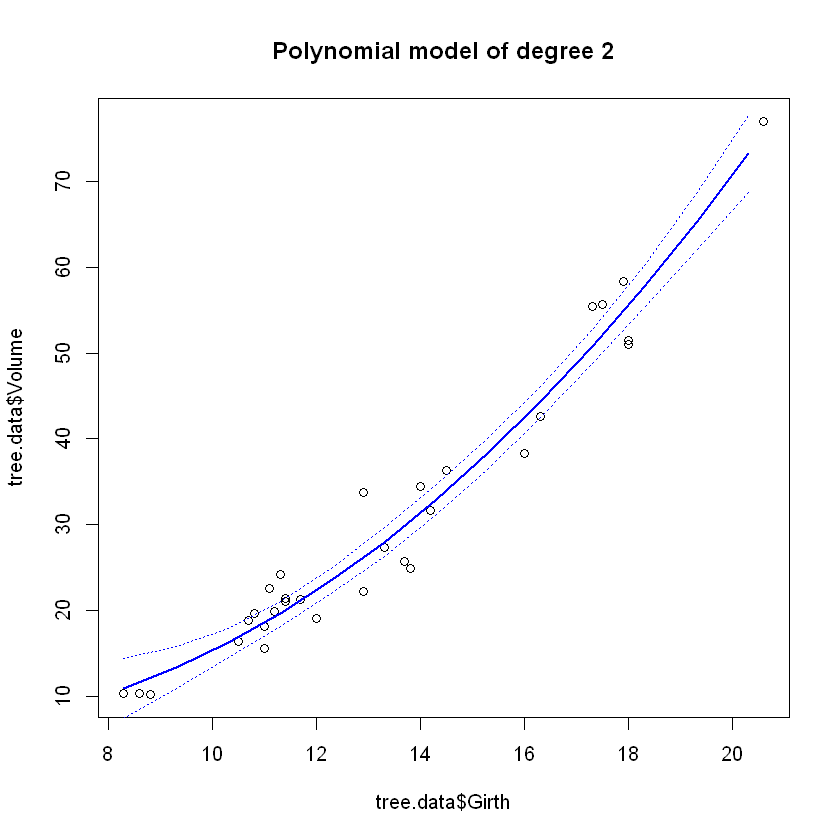

In [7]:
poly.fit=lm(Volume~poly(Girth,2),data=tree.data)

girth.lims=range(tree.data$Girth)
girth.grid=seq(from=girth.lims[1],to=girth.lims[2])
poly.preds=predict(poly.fit,newdata=list(Girth=girth.grid),se=T)
se.bands=cbind(poly.preds$fit+2*poly.preds$se.fit,poly.preds$fit-2*poly.preds$se.fit)
plot(tree.data$Girth,tree.data$Volume)
lines(girth.grid,poly.preds$fit,lwd=2,col="blue")
matlines(girth.grid,se.bands,lwd=1,col="blue",lty=3)
title("Polynomial model of degree 2")

### 2. Use a polynomial logistic regression model with deg=2 to predict whether the Volume is larger or not than 30, using the variable Girth. 
Plot the function P (Volume > 30) with respect to Girth and the confidence bands with ±2 standard error.

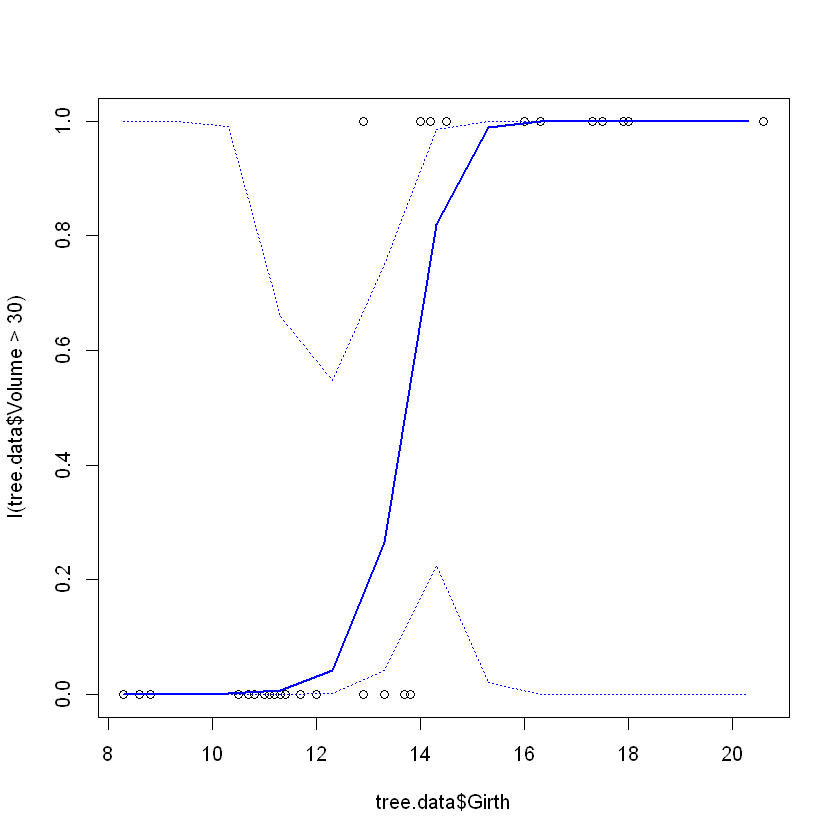

In [8]:
fit=glm(I(Volume>30)~poly(Girth,2),data=tree.data,family=binomial)
preds=predict(fit,newdata=list(Girth=girth.grid),se=T)
pfit=1-1/(1+exp(preds$fit))
se.bands.logit=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
se.bands=1-1/(1+exp(se.bands.logit))
plot(tree.data$Girth,I(tree.data$Volume>30))
lines(girth.grid,pfit,lwd=2,col="blue")
matlines(girth.grid,se.bands,lwd=1,lty=3,col="blue")

### 3. Fit a regression spline with deg=2 to predict the Volume using the variable Girth at knots 10, 14, 18. 
Plot the function and also the confidence bands with ±2 standard error.

using bs() function to generate the basis functions of regression spline with deg = 2

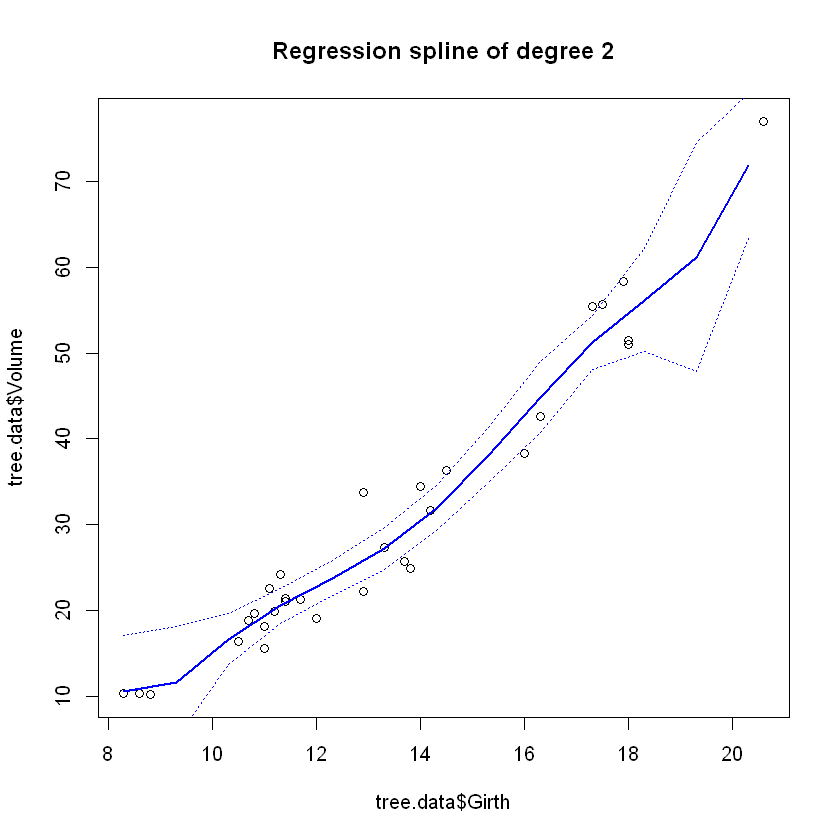

In [9]:
library(splines)
spline.fit=lm(Volume~bs(Girth,knots=c(10,14,18),df=2),data=tree.data)

girth.lims=range(tree.data$Girth)
girth.grid=seq(from=girth.lims[1],to=girth.lims[2])
spline.preds=predict(spline.fit,newdata=list(Girth=girth.grid),se=T)
se.bands=cbind(spline.preds$fit+2*spline.preds$se.fit,spline.preds$fit-2*spline.preds$se.fit)
plot(tree.data$Girth,tree.data$Volume)
lines(girth.grid,spline.preds$fit,lwd=2,col="blue")
matlines(girth.grid,se.bands,lwd=1,col="blue",lty=3)
title("Regression spline of degree 2")

using ns() function to generate the basis functions of natural spline with deg = 2

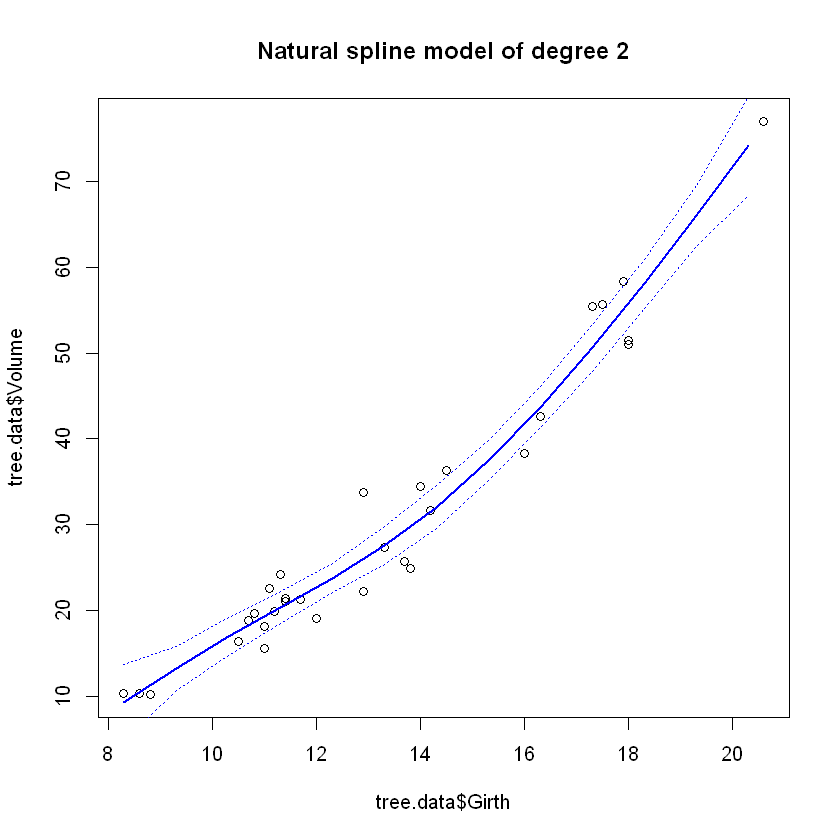

In [10]:
spline.fit=lm(Volume~ns(Girth,knots=c(10,14,18),df=2),data=tree.data)

girth.lims=range(tree.data$Girth)
girth.grid=seq(from=girth.lims[1],to=girth.lims[2])
spline.preds=predict(spline.fit,newdata=list(Girth=girth.grid),se=T)
se.bands=cbind(spline.preds$fit+2*spline.preds$se.fit,spline.preds$fit-2*spline.preds$se.fit)
plot(tree.data$Girth,tree.data$Volume)
lines(girth.grid,spline.preds$fit,lwd=2,col="blue")
matlines(girth.grid,se.bands,lwd=1,col="blue",lty=3)
title("Natural spline model of degree 2")

### 4. Fit a smoothing spline to predict the Volume using the variable Girth where the smoothing level is chosen by Cross-Validation. 
Plot the function. What is the used degrees of freedom?

In [11]:
fit=smooth.spline(tree.data$Girth,tree.data$Volume,cv=T)
cat("used degrees of freedom =",fit$df)

used degrees of freedom = 3.87138

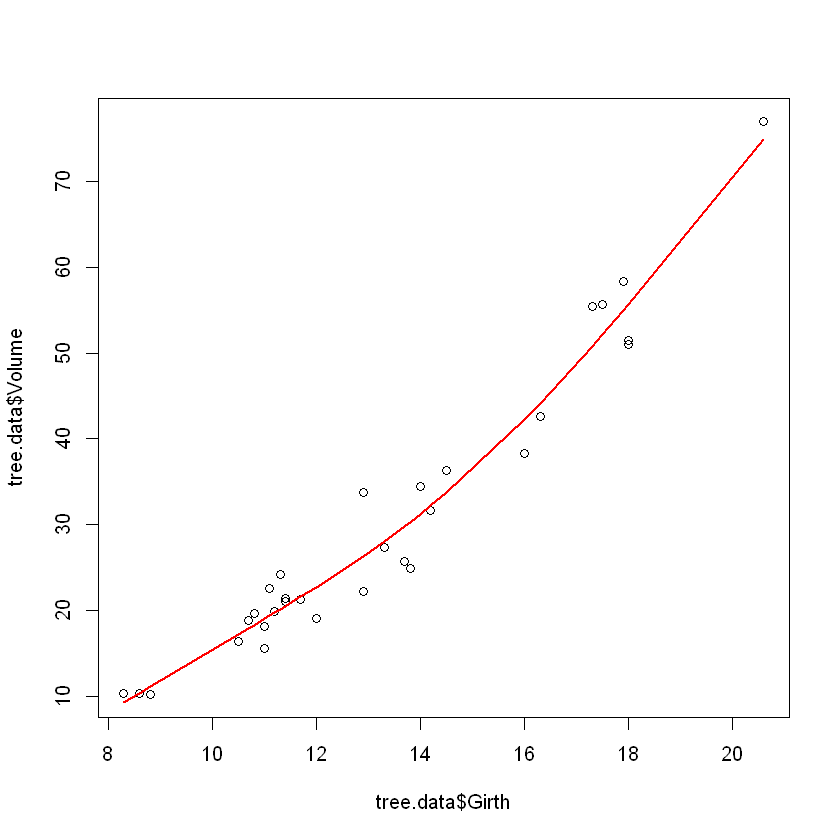

In [12]:
plot(tree.data$Girth,tree.data$Volume)
lines(fit,col="red",lwd=2)

### 5. Use both the variable Girth and Height to predict the Volume by a GAM 
where the individual function on Girth is a smoothing spline with df=4 and the function on Height is a smoothing spline with df=5. Plot the functions and also the confidence bands.

载入需要的程辑包：foreach

Loaded gam 1.20.2




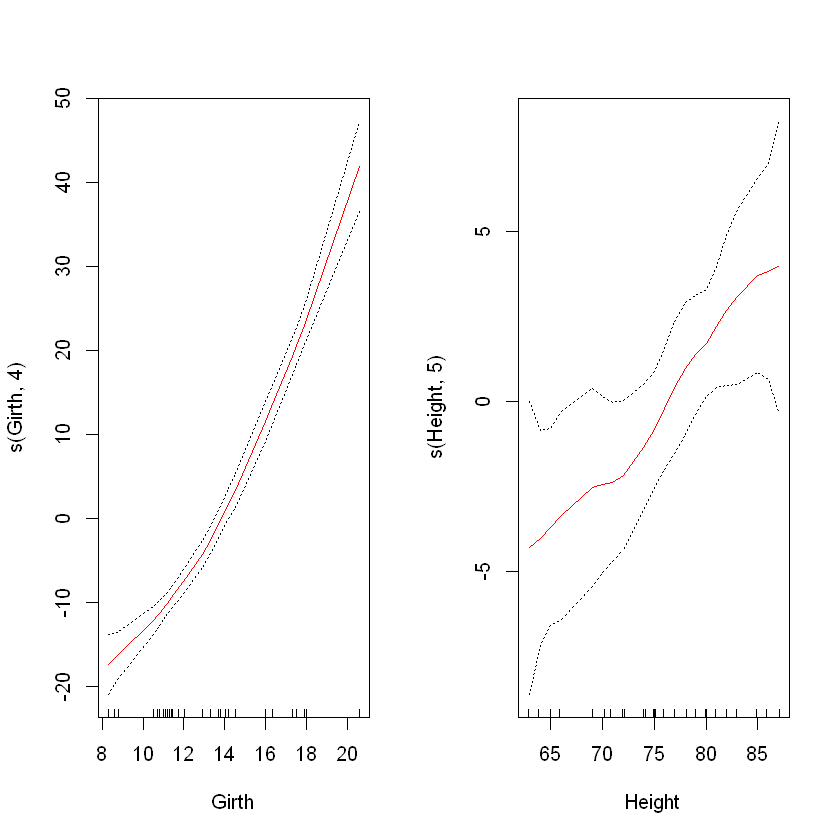

In [13]:
library(gam);

gam.mod=gam(Volume~s(Girth,4)+s(Height,5),data=tree.data)
par(mfrow=c(1,2))
plot(gam.mod,se=T,col="red")

## Problem 2: Audit Risk

First of all, import all train and test dataset.

In [14]:
audit.train=read.csv("audit_train.csv")
audit.test=read.csv("audit_test.csv")

and we should clean the dataset by removing not numerical value and dropping all the na.

In [15]:
audit.train$LOCATION_ID=as.numeric(audit.train$LOCATION_ID)
audit.train=na.omit(audit.train)
audit.train$Risk=as.factor(audit.train$Risk)
audit.test$LOCATION_ID=as.numeric(audit.test$LOCATION_ID)
audit.test=na.omit(audit.test)
audit.test$Risk=as.factor(audit.test$Risk)

### 1. Use the train dataset to 
1. fit a classification tree and, 
2. plot the tree and 
3. report the training error. 
4. Test the performance on the test dataset and 
5. report the confusion matrix.

In [16]:
library(tree);

In [17]:
tree.mod=tree(Risk~.,data=audit.train)

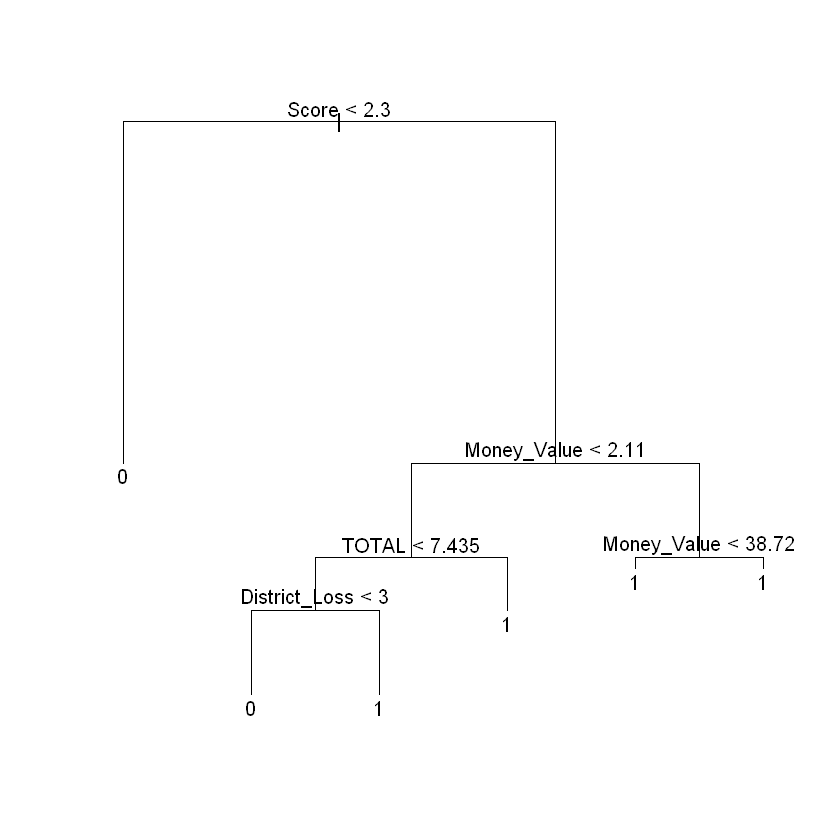

In [18]:
plot(tree.mod)
text(tree.mod,pretty=0)

In [19]:
summary(tree.mod)


Classification tree:
tree(formula = Risk ~ ., data = audit.train)
Variables actually used in tree construction:
[1] "Score"         "Money_Value"   "TOTAL"         "District_Loss"
Number of terminal nodes:  6 
Residual mean deviance:  0.4866 = 276.9 / 569 
Misclassification error rate: 0.06957 = 40 / 575 

the tranning error can be obtained by the misclassifcation error rate, which is 0.06957.

In [20]:
preds=predict(tree.mod,newdata=audit.test,type="class")
preds

[1] 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 [38] 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0
 [75] 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0
[112] 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1
[149] 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0
[186] 0 0 1 1 0 1 0 0 0 1 0 0
Levels: 0 1

In [21]:
test.acc=mean(preds==audit.test$Risk)
cat("test accuracy(test perf) = ",test.acc,"\n")
cat("test misclassifiction error rate(test perf) = ",1-test.acc)

test accuracy(test perf) =  0.9441624 
test misclassifiction error rate(test perf) =  0.05583756

In [22]:
cat("The confusion matrix is:")
table(preds,audit.test$Risk)

The confusion matrix is:

     
preds   0   1
    0 103   5
    1   6  83

### 2. Use CV to prune the tree in Step 1 on the train dataset. 
1. Plot the train error versus the tree size. 
2. Plot the pruned tree which has the best train error. 
3. Report the test error.

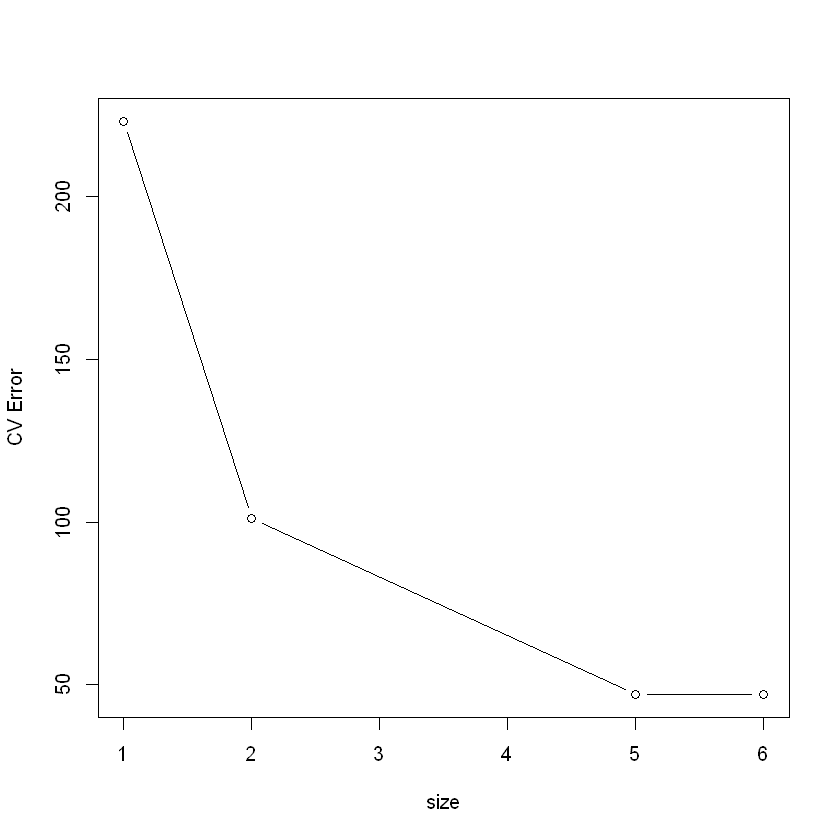

In [23]:
cv.tree.mod=cv.tree(tree.mod,FUN=prune.misclass)
plot(cv.tree.mod$size,cv.tree.mod$dev,type="b",xlab="size",ylab="CV Error")

From the plot, we can see the pruned tree with size=5 has the best train error, so we choose it.

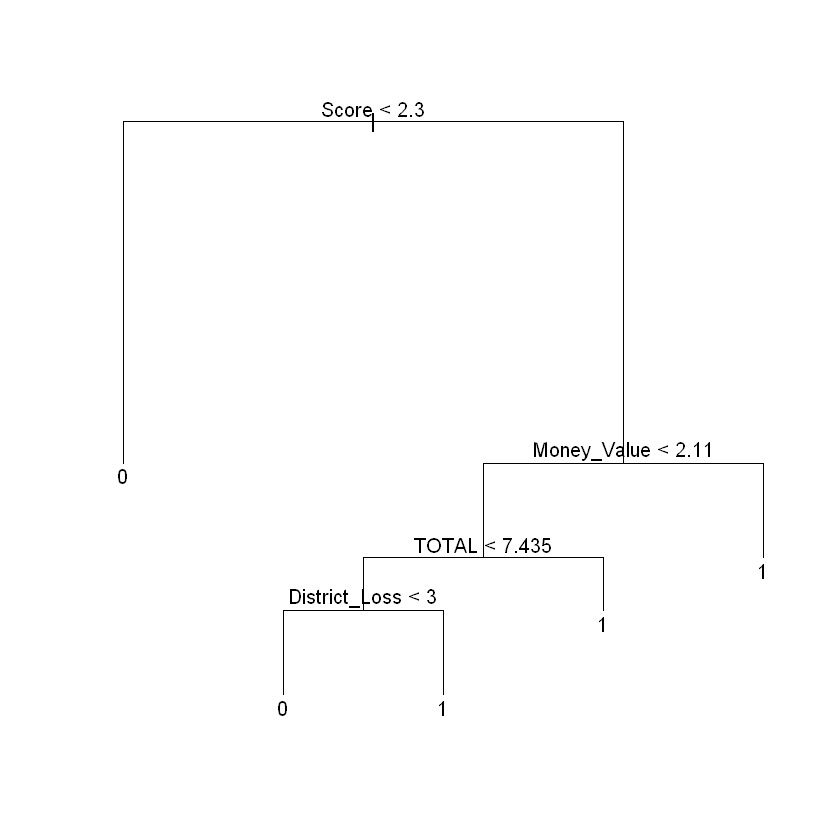

In [24]:
pruned.tree=prune.misclass(tree.mod, best = 5)
plot(pruned.tree)
text(pruned.tree, pretty = 0)

In [25]:
preds=predict(pruned.tree,newdata=audit.test,type="class")
test.acc=mean(preds==audit.test$Risk)
cat("test accuracy(test perf) = ",test.acc,"\n")
cat("test misclassifiction error rate(test perf) = ",1-test.acc)

test accuracy(test perf) =  0.9441624 
test misclassifiction error rate(test perf) =  0.05583756

### 3. Use random forest on the train dataset to build a classifier to predict the risk where setting m=13 and ntree=25. 
Report the training error.

In [26]:
library(randomForest);

set.seed(5054)
rf.mod=randomForest(Risk~.,data=audit.train,mtry=13,ntree=25)
print(rf.mod)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.




Call:
 randomForest(formula = Risk ~ ., data = audit.train, mtry = 13,      ntree = 25) 
               Type of random forest: classification
                     Number of trees: 25
No. of variables tried at each split: 13

        OOB estimate of  error rate: 9.04%
Confusion matrix:
    0   1 class.error
0 327  25  0.07102273
1  27 196  0.12107623


The traning error is 9.04% (normalized)

In [27]:
preds=predict(rf.mod,newdata=audit.test,type="class")
preds
test.acc=mean(preds==audit.test$Risk)
cat("test accuracy(test perf) = ",test.acc,"\n")
cat("test misclassifiction error rate(test perf) = ",1-test.acc)

1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21 
  0   1   1   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   1   1 
 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
  1   0   0   0   1   1   1   1   0   0   0   0   0   0   0   1   0   0   0   1 
 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62 
  0   1   1   0   1   0   1   0   0   0   1   0   1   0   0   0   1   0   1   0 
 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 
  0   1   0   1   1   0   0   1   1   1   1   0   1   0   0   1   0   0   0   1 
 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 
  0   1   0   1   0   1   1   1   1   1   0   0   1   0   1   0   0   1   0   0 
103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 
  1   0   0   0   0   0   1   0   1   0   0   0   0   0   0   1   0   1   1   0 
123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 
  1   1   0   1   1   1   1   0   0   0   0   0   0   1   1   0   1   1   1   1 
143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 
  1   1   0   0   0   0   1   1   0   0   0   1   1   0   1   1   1   0   0   1 
163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 
  0   1   1   0   0   0   0   1   1   0   0   0   0   1   1   1   0   0   0   1 
183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 
  0   1   0   1   0   0   0   1   1   0   1   0   0   0   1   0   0 
Levels: 0 1

test accuracy(test perf) =  0.9543147 
test misclassifiction error rate(test perf) =  0.04568528

### 4. Repeat Step 3 with four difference choices m = 8, 12, 14, 16, 18 and 
choose the one with smallest misclassification error on the train dataset. 
Test its performance on the test dataset.

In [28]:
set.seed(1)
for(m in c(8, 12, 14, 16, 18)){
    rf.mod=randomForest(Risk~.,data=audit.train,mtry=m,ntree=25)
    print(rf.mod)
}


Call:
 randomForest(formula = Risk ~ ., data = audit.train, mtry = m,      ntree = 25) 
               Type of random forest: classification
                     Number of trees: 25
No. of variables tried at each split: 8

        OOB estimate of  error rate: 9.04%
Confusion matrix:
    0   1 class.error
0 325  27  0.07670455
1  25 198  0.11210762

Call:
 randomForest(formula = Risk ~ ., data = audit.train, mtry = m,      ntree = 25) 
               Type of random forest: classification
                     Number of trees: 25
No. of variables tried at each split: 12

        OOB estimate of  error rate: 8.7%
Confusion matrix:
    0   1 class.error
0 327  25  0.07102273
1  25 198  0.11210762

Call:
 randomForest(formula = Risk ~ ., data = audit.train, mtry = m,      ntree = 25) 
               Type of random forest: classification
                     Number of trees: 25
No. of variables tried at each split: 14

        OOB estimate of  error rate: 9.57%
Confusion matrix:
    0   1 cl

From above results, we find the random forest model with m = 12 having smallest misclassification error, so we choose it.

In [29]:
rf.mod=randomForest(Risk~.,data=audit.train,mtry=12,ntree=25)
preds=predict(rf.mod,newdata=audit.test,type="class")
preds
test.acc=mean(preds==audit.test$Risk)
cat("test accuracy(test perf) = ",test.acc,"\n")
cat("test misclassifiction error rate(test perf) = ",1-test.acc)

1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21 
  0   1   1   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   1   1 
 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
  1   0   1   0   1   1   1   1   0   0   0   0   0   0   0   1   0   0   0   1 
 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62 
  0   1   1   0   1   0   1   0   0   0   1   0   1   0   0   0   1   0   1   0 
 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 
  0   1   0   1   1   0   0   1   1   1   1   0   1   0   0   1   0   0   0   1 
 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 
  0   1   0   1   0   1   1   1   1   1   0   0   1   0   1   0   0   1   0   0 
103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 
  1   0   0   1   0   0   1   0   1   0   0   0   0   0   0   1   0   1   1   0 
123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 
  1   1   0   1   1   1   1   0   0   0   0   0   0   1   1   0   1   1   1   1 
143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 
  1   1   0   0   0   0   1   1   0   0   0   1   1   0   1   1   1   0   0   1 
163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 
  0   1   1   0   0   0   0   1   1   0   0   0   0   1   1   1   0   0   0   1 
183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 
  0   1   0   1   0   0   0   1   1   0   1   0   0   0   1   0   0 
Levels: 0 1

test accuracy(test perf) =  0.964467 
test misclassifiction error rate(test perf) =  0.03553299

### 5. Compare the above methods and report any findings you observe.

From above 4 methods, we conclude these test performance in following table:

| Method      | Test Accuracy |
| ----------- | ----------- |
| Tree      | 0.9441624       |
| Pruned Tree  | 0.9441624       |
| Random Forest(m=13)   | 0.9543147        |
| Random Forest(m=12)   | 0.964467        |

The random forest models have better classification performance on the test dataset comparing to the basic tree model. And we find the random forest model with m=12 is better than the model with m=13, so we can conclude that the hyperparameter tuning is essential for random forest model. Meanwhile, we can observe the tree model and prunned tree share the same test accuracy, although the prunned tree has simpler structure complexity, it doesn't means the prunned tree must have better performance on test dataset than tree.